In [13]:
specs = {'adaptingDataframe': {'changeType': {}, 'renameMap': {}, 'setValue': None, 'colName': 'id_indicateur',
                               'value': '??', 'toDrop': []}, 'catalogUri': 'None',
         'confDb': {'chunksize': 1000, 'schema': 'surfor', 'strategy': 'append',
                    'tableName': 'faits_GFC_treecover2000'},
         'confDims': {'isin_id_mesure': [3, 100], 'isin_id_spatial': ['None']},
         'confRaster': {'api': 'GEE', 'masque': [30,50,70,100], 'outputValue': 'classifie',
                        'defaultValue': 0.0, 'overlayHow': 'identity',
                        'uri_image': 'UMD/hansen/global_forest_change_2021_v1_9', 'windows_height': 2048,
                        'windows_width': 2048, 'bandName': 'treecover2000'}, 'dataName': 'gfc_treecover2000', 'epsg': 'EPSG:4326',
         'overlayHow': 'identity', 'sourceType': 'Raster'}

In [14]:
%load_ext autoreload
%autoreload 2
import generate_indicator
import ee
import geemap as gee
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show

# instanciation de ee
service_account = 'ee-oeil@surfor.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, '../generate_indicator/gee_credentials.json')
ee.Initialize(credentials)

# création de l'input : geodataframe avec N polygone et N points
zone1 = ee.Geometry.Polygon(
    [[[166.40, -22.22], [166.40, -22.15], [166.42, -22.13], [166.45, -22.15], [166.45, -22.22]]])
zone2 = ee.Geometry.Polygon(
    [[[166.50, -22.10], [166.50, -22.15], [166.52, -22.12], [166.54, -22.15], [166.54, -22.10]]])
features = [
    ee.Feature(zone1, {'name': 'zone1'}),
    ee.Feature(zone2, {'name': 'zone2'}),
]
gdf = gee.ee_to_geopandas(ee.FeatureCollection(features)).set_crs(4326)

# traitement
output_gdf = generate_indicator.gee.extract_data(specs, gdf)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Les valeurs inférieures ou égales à 30 ou supérieures à 100 ne seront pas considérées.
Classification des données selon les intervals suivants : [30,50[ = 1 | [50,70[ = 2 | [70,100] = 3
Analyse de la feature n°1 / 2


c:\Users\clement.niot\Anaconda3\envs\bilbo_packages\Lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:


Analyse de la feature n°2 / 2


c:\Users\clement.niot\Anaconda3\envs\bilbo_packages\Lib\site-packages\rasterstats\main.py:156: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if 'Point' in geom.type:


taille de l'image 'zone1' : (360, 200)
valeur du pixel en position (100,120) : 3
valeur du pixel en position (170,150) : --


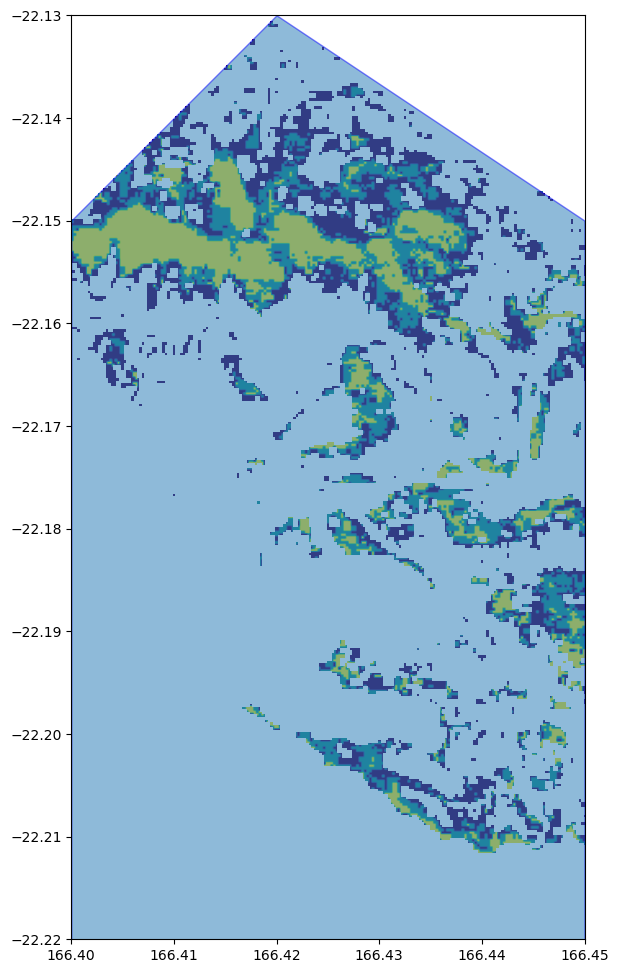

taille de l'image 'zone2' : (200, 160)
valeur du pixel en position (100,120) : 2
valeur du pixel en position (170,150) : --


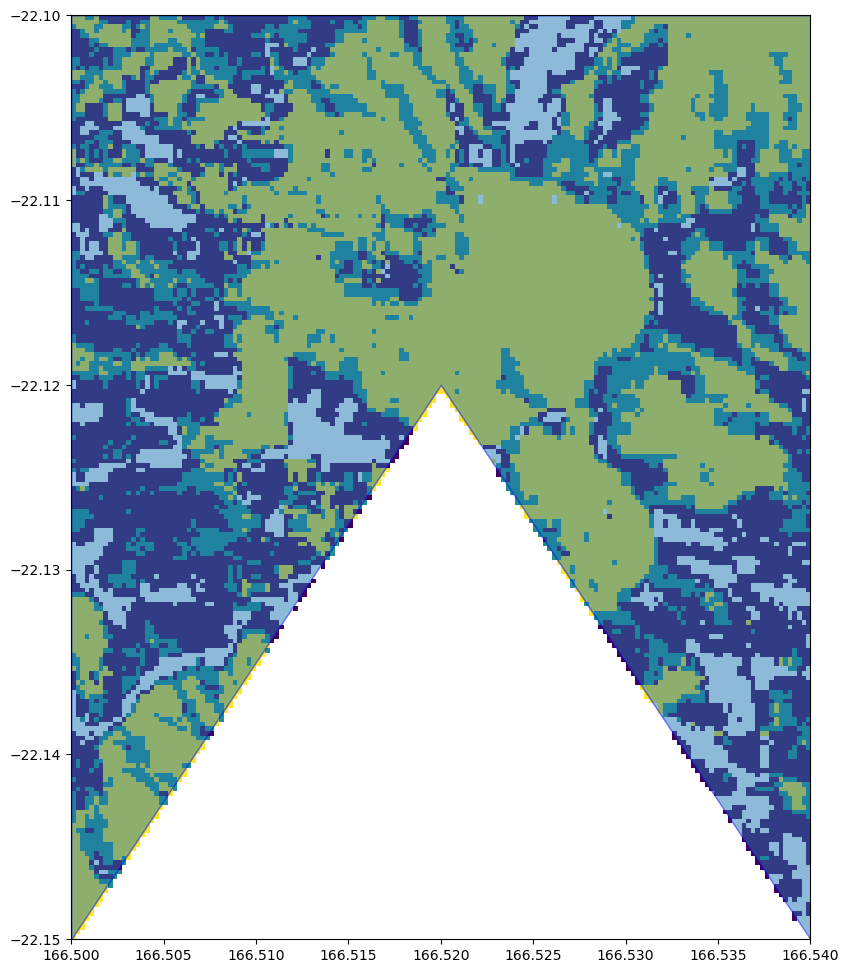

In [15]:
# représentation des résultats
for feature in output_gdf.iterfeatures():
    image_clipped = feature.get('properties').get('mini_raster_array')
    transform = feature.get('properties').get('mini_raster_affine')
    sample_gdf = gpd.GeoDataFrame.from_features([feature])
    print("taille de l'image '{name}' : {shape}".format(shape=image_clipped.shape, name=feature.get('properties').get('name')))
    print("valeur du pixel en position ({x},{y}) : {valeur}".format(x=100, y=120, valeur=image_clipped[100][120]))
    print("valeur du pixel en position ({x},{y}) : {valeur}".format(x=170, y=150, valeur=image_clipped[170][150]))
    fig, ax = plt.subplots(figsize=(50, 12))
    sample_gdf.plot(ax=ax, edgecolor='blue', alpha=0.5)
    show(image_clipped, ax=ax, transform=transform)
    plt.show()